In [71]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv('/Users/iseojun/Desktop/2학년 1학기/인공지능프로그래밍/car.data')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns :
    df[i] = le.fit_transform(df[i])

In [74]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [75]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

<Axes: xlabel='unacc', ylabel='count'>

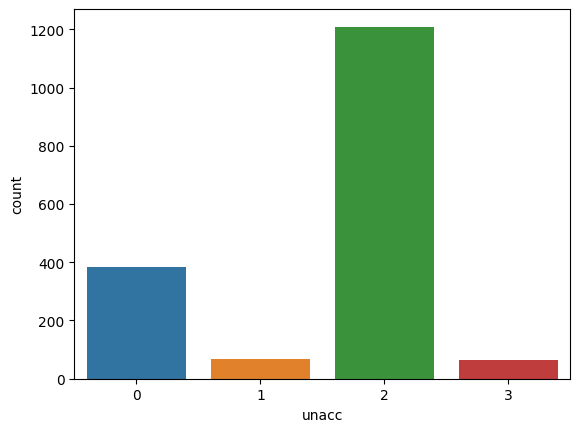

In [76]:
import seaborn as sns
sns.countplot(data=df,x="unacc")

In [78]:
X = df.drop('unacc', axis=1)
y = df['unacc']
Y = pd.get_dummies(y).values

from keras.utils import to_categorical

y = to_categorical(y)


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [79]:
X

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [80]:
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(40,input_shape=(6,),activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 40)                280       
                                                                 
 dense_41 (Dense)            (None, 30)                1230      
                                                                 
 dense_42 (Dense)            (None, 20)                620       
                                                                 
 dense_43 (Dense)            (None, 4)                 84        
                                                                 
Total params: 2,214
Trainable params: 2,214
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8778 - accuracy: 0.6879 - val_loss: 0.8640 - val_accuracy: 0.6908
Epoch 2/100
44/44 [==============================] - 0s 588us/step - loss: 0.8393 - accuracy: 0.7024 - val_loss: 0.8783 - val_accuracy: 0.6908
Epoch 3/100
44/44 [==============================] - 0s 622us/step - loss: 0.8413 - accuracy: 0.7024 - val_loss: 0.8831 - val_accuracy: 0.6908
Epoch 4/100
44/44 [==============================] - 0s 634us/step - loss: 0.8475 - accuracy: 0.7024 - val_loss: 0.8764 - val_accuracy: 0.6908
Epoch 5/100
44/44 [==============================] - 0s 585us/step - loss: 0.8396 - accuracy: 0.7024 - val_loss: 0.8639 - val_accuracy: 0.6908
Epoch 6/100
44/44 [==============================] - 0s 622us/step - loss: 0.8358 - accuracy: 0.7024 - val_loss: 0.8708 - val_accuracy: 0.6908
Epoch 7/100
44/44 [==============================] - 0s 615us/step - loss: 0.8447 - accuracy: 0.7024 - val_loss: 0.9076 - val_accuracy: 0.6908
E

Epoch 58/100
44/44 [==============================] - 0s 604us/step - loss: 0.3033 - accuracy: 0.8812 - val_loss: 0.4551 - val_accuracy: 0.8468
Epoch 59/100
44/44 [==============================] - 0s 583us/step - loss: 0.2918 - accuracy: 0.8805 - val_loss: 0.3182 - val_accuracy: 0.8555
Epoch 60/100
44/44 [==============================] - 0s 584us/step - loss: 0.2607 - accuracy: 0.8936 - val_loss: 0.3123 - val_accuracy: 0.8671
Epoch 61/100
44/44 [==============================] - 0s 559us/step - loss: 0.2885 - accuracy: 0.8769 - val_loss: 0.3157 - val_accuracy: 0.8786
Epoch 62/100
44/44 [==============================] - 0s 583us/step - loss: 0.2540 - accuracy: 0.8936 - val_loss: 0.3229 - val_accuracy: 0.8642
Epoch 63/100
44/44 [==============================] - 0s 566us/step - loss: 0.2330 - accuracy: 0.9044 - val_loss: 0.2698 - val_accuracy: 0.8988
Epoch 64/100
44/44 [==============================] - 0s 571us/step - loss: 0.1920 - accuracy: 0.9290 - val_loss: 0.2205 - val_accuracy:

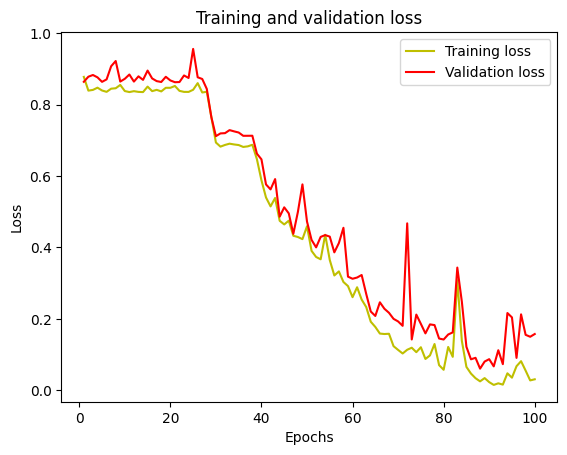

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

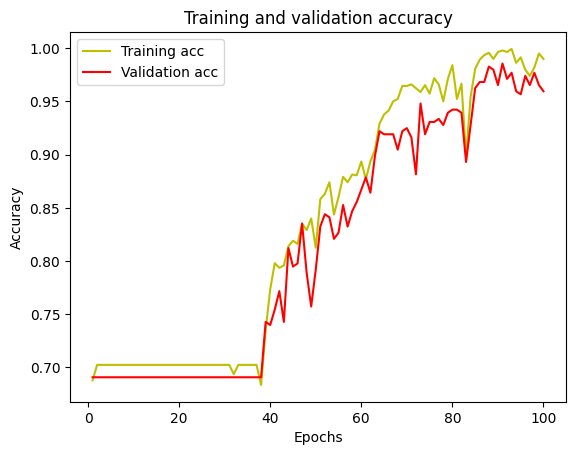

In [85]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        77
           1       0.93      0.93      0.93        14
           2       0.99      0.98      0.99       239
           3       1.00      0.69      0.81        16

    accuracy                           0.96       346
   macro avg       0.95      0.89      0.91       346
weighted avg       0.96      0.96      0.96       346

[[ 73   1   3   0]
 [  1  13   0   0]
 [  4   0 235   0]
 [  5   0   0  11]]
